In [1]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# importing Keras and required libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import Adam

In [3]:
# Importing the dataset

training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

In [4]:
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
testing_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [8]:
y = training_data.iloc[:, 0:1].values

In [9]:
X = training_data.iloc[:, 1:].values

In [10]:
X = X/255.0
testing_data = testing_data.values/255.0

In [11]:
X = X.reshape(-1, 28, 28, 1)

In [12]:
testing_data = testing_data.reshape(-1, 28, 28, 1)

In [13]:
encoder = OneHotEncoder(categorical_features=[0])
y = encoder.fit_transform(y).toarray()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

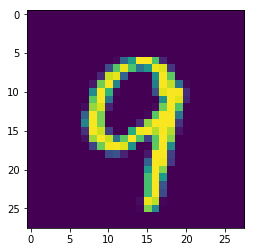

In [15]:
plt.imshow(X_train[1][:,:,0])
plt.show()

In [16]:
# Structuring the CNN

In [17]:
# Building the convolutional neural network

classifier = Sequential()

# Adding the first 2 convolution layer

classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))

# Pooling layer

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Dropout(.1))

# Adding the second 2 convolution layer

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))

# 2nd Pooling layer

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Dropout(.1))

# Adding the flattening layer

classifier.add(Flatten())

# Adding the ANN

classifier.add(Dense(units=300, activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=150, activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=10, activation='softmax'))



In [18]:
# Dynamic Reduction of Learning rate when accuracy reaches plateau

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.25, patience=2, min_lr=0.0001)

In [19]:
# Compiling the ANN

classifier.compile(optimizer=Adam(lr=0.002), loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the CNN on DATASET using the keras documentation

train_datagen = ImageDataGenerator(shear_range=0.2,
                                   zoom_range=0.2,
                                   height_shift_range=.1,
                                   rotation_range=10,
                                   width_shift_range=.1)

train_datagen.fit(X_train)

In [ ]:
# Fitting the Generator on Network

classifier.fit_generator(
        train_datagen.flow(X_train,y_train, batch_size=40),
        steps_per_epoch=X_train.shape[0] // 40,
        epochs=40,
        validation_data=(X_test,y_test),callbacks=[reduce_lr])

Epoch 1/40
945/945 [==============================] - 329s - loss: 0.3549 - acc: 0.8842 - val_loss: 0.0467 - val_acc: 0.9860
Epoch 2/40
945/945 [==============================] - 330s - loss: 0.1320 - acc: 0.9597 - val_loss: 0.0735 - val_acc: 0.9800
Epoch 3/40
945/945 [==============================] - 325s - loss: 0.1098 - acc: 0.9678 - val_loss: 0.0422 - val_acc: 0.9890
Epoch 4/40
945/945 [==============================] - 330s - loss: 0.0955 - acc: 0.9720 - val_loss: 0.0475 - val_acc: 0.9879
Epoch 5/40
945/945 [==============================] - 331s - loss: 0.0880 - acc: 0.9749 - val_loss: 0.0430 - val_acc: 0.9883
Epoch 6/40
945/945 [==============================] - 294s - loss: 0.0821 - acc: 0.9758 - val_loss: 0.0466 - val_acc: 0.9879
Epoch 7/40
945/945 [==============================] - 320s - loss: 0.0522 - acc: 0.9839 - val_loss: 0.0310 - val_acc: 0.9926
Epoch 8/40
945/945 [==============================] - 311s - loss: 0.0431 - acc: 0.9864 - val_loss: 0.0327 - val_acc: 0.9931


In [19]:
# Prediction

submission = classifier.predict(testing_data)

# Maximum Probability Index

submission = np.argmax(submission, axis = 1)
submission = pd.Series(submission,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)

submission.to_csv("cnn_mnist_v4.csv",index=False)